##**WEEK 1 - SAUTER CHALLENGE**

##Tratamento de Dados de Avaliações de Aplicativo

Objetivo: Lidar com dados provenientes de avaliações de aplicativos da App Store e/ou Google Play Store.

##Sobre o conjunto de dados.

O conjunto de dados de avaliações de aplicativos do Instagram é uma coleção abrangente de avaliações de usuários do aplicativo móvel Instagram na Google Play Store, capturando insights e sentimentos valiosos. O conjunto de dados permite a compreensão da satisfação do usuário, avaliação do desempenho do aplicativo e identificação de padrões emergentes.

##A forma como os dados foram coletados

Extraindo avaliações do aplicativo **Instagram** na Google Play Store.

##Colunas

- review_description : comentário feito pelos avaliadores.
- rating : avaliação geral sobre o aplicativo de 1 até 5 estrelas.
- review_date : data que a avaliação foi realizada.



### Fazendo a instalação e importação das bibliotecas que serão utilizadas no projeto

In [148]:
!pip install sqlalchemy==1.4.46
!pip install pandasql

In [149]:
import pandas as pd
from pandasql import sqldf

### Lendo o arquivo com as avaliações do dataset do instagram

In [150]:
df_reviews_instagram = pd.read_csv('/content/instagram.csv')

### Criando dicionario para traduzir nome das colunas para pt/br

In [151]:
traducoes = {
    "review_description":"comentario",
    "rating":"avaliacao",
    "review_date":"data_da_avaliacao"
}

### Aplicando as substituições

In [152]:
df_reviews_instagram.rename(columns=traducoes,inplace=True)

### criando uma nova coluna [etl_timestamp] apartir da coluna [data da avaliacao]

In [153]:
df_reviews_instagram['etl_timestamp'] = df_reviews_instagram['data_da_avaliacao']

### Transformando a coluna [etl_timestamp] de object para datetime64[ns]

In [154]:
df_reviews_instagram['etl_timestamp'] = pd.to_datetime(df_reviews_instagram['etl_timestamp'])

### valindo a alteração de object para datetime64[ns]

In [155]:
df_reviews_instagram.dtypes

comentario                   object
avaliacao                     int64
data_da_avaliacao            object
etl_timestamp        datetime64[ns]
dtype: object

### verificando se existem valores que sao nulos

In [156]:
df_reviews_instagram.isnull().sum()

comentario           0
avaliacao            0
data_da_avaliacao    0
etl_timestamp        0
dtype: int64

### Transformando o dataframe para json e salvando o arquivo .json

In [157]:
df_reviews_instagram.to_json('desafioSauter.json', orient='records')

### Agrupando dados para plotar gráfico com a relação **quantidade de avaliações** x **avaliação**

In [158]:
dados_agrupados = df_reviews_instagram.groupby('avaliacao').size()

<Axes: xlabel='avaliacao', ylabel='Quantidade de avaliacoes'>

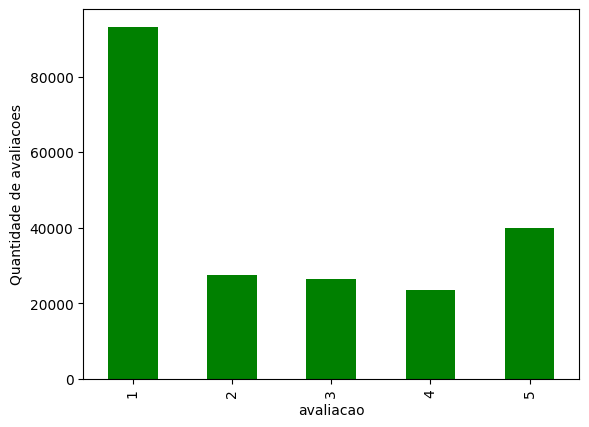

In [160]:
dados_agrupados.plot.bar(color='green',ylabel='Quantidade de avaliacoes')